In [1]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import pickle

/home/anonymous/miniconda3/envs/belka/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
merged_df = pd.read_parquet('training_small_fingers_set.parquet')

In [3]:
import swifter

# Step 3: Unpacking the Avalon data
def unpack_avalon(encoded_avalon):
    return pickle.loads(encoded_avalon)

# Apply the unpack function to the Avalon column
merged_df['Torsion_unpacked'] = merged_df['Torsion'].swifter.apply(unpack_avalon)

# Optionally, convert boolean lists into separate feature columns or handle as appropriate
# Example of expansion into separate columns if necessary
# This part depends on the exact structure and needs of your model training
avalon_features = pd.DataFrame(merged_df['Torsion_unpacked'].tolist())
avalon_features.columns = ['Torsion_feature_' + str(i) for i in tqdm(range(avalon_features.shape[1]))]
merged_df = pd.concat([merged_df, avalon_features.astype('int8')], axis=1).drop('Torsion', axis=1)

train = merged_df[(merged_df['test_u']==False)&(merged_df['test1']==False)&(merged_df['test2']==False)]
test = merged_df[(merged_df['test_u']==True)]

100%|██████████| 2048/2048 [00:00<00:00, 2239878.64it/s]


KeyError: "['Avalon_unpacked'] not found in axis"

In [4]:
X_train = train.drop(['binds','molecule_smiles','test_u','test1','test2','Torsion_unpacked','ecfp','maccs','RDKFingerprint', 'Avalon'], axis=1)  # features
y_train = train['binds']  # labels

X_test = test.drop(['binds','molecule_smiles','test_u','test1','test2','Torsion_unpacked','ecfp','maccs','RDKFingerprint', 'Avalon'], axis=1)  # features
y_test = test['binds']  # labels

In [5]:

# Assuming X_train is already defined and is a pandas DataFrame
total_memory_bytes = X_train.memory_usage(deep=True).sum()  # Calculate total memory usage in bytes
total_memory_gb = total_memory_bytes / (1024 ** 3)  # Convert bytes to gigabytes

print(f"The size of X_train in memory is approximately {total_memory_gb:.3f} GB")

The size of X_train in memory is approximately 3.231 GB


In [6]:
X_train

,molecular_size,protein_name_BRD4,protein_name_HSA,protein_name_sEH,Torsion_feature_0,Torsion_feature_1,Torsion_feature_2,Torsion_feature_3,Torsion_feature_4,Torsion_feature_5,...,Torsion_feature_2038,Torsion_feature_2039,Torsion_feature_2040,Torsion_feature_2041,Torsion_feature_2042,Torsion_feature_2043,Torsion_feature_2044,Torsion_feature_2045,Torsion_feature_2046,Torsion_feature_2047
2,72,0.0,0.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,63,1.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,71,0.0,0.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,69,0.0,0.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,78,1.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020475,61,0.0,1.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020477,58,0.0,1.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020478,65,0.0,1.0,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2020479,73,0.0,0.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


[0]	train-auc:0.76314	train-map_micro:0.05969	test-auc:0.67613	test-map_micro:0.03061
[1]	train-auc:0.77779	train-map_micro:0.09010	test-auc:0.68677	test-map_micro:0.04616
[2]	train-auc:0.78820	train-map_micro:0.09386	test-auc:0.68857	test-map_micro:0.04454
[3]	train-auc:0.78939	train-map_micro:0.09323	test-auc:0.69246	test-map_micro:0.04548
[4]	train-auc:0.79067	train-map_micro:0.09786	test-auc:0.69183	test-map_micro:0.04811
[5]	train-auc:0.80001	train-map_micro:0.09897	test-auc:0.69421	test-map_micro:0.04877
[6]	train-auc:0.79979	train-map_micro:0.10062	test-auc:0.69292	test-map_micro:0.04879
[7]	train-auc:0.80003	train-map_micro:0.10491	test-auc:0.69162	test-map_micro:0.05170
[8]	train-auc:0.79998	train-map_micro:0.10435	test-auc:0.69204	test-map_micro:0.05182
[9]	train-auc:0.79736	train-map_micro:0.10579	test-auc:0.69022	test-map_micro:0.05296
[10]	train-auc:0.79617	train-map_micro:0.10462	test-auc:0.68880	test-map_micro:0.05217
[11]	train-auc:0.79793	train-map_micro:0.10723	test-a

/home/anonymous/miniconda3/envs/belka/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [07:38:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1713397827678/work/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


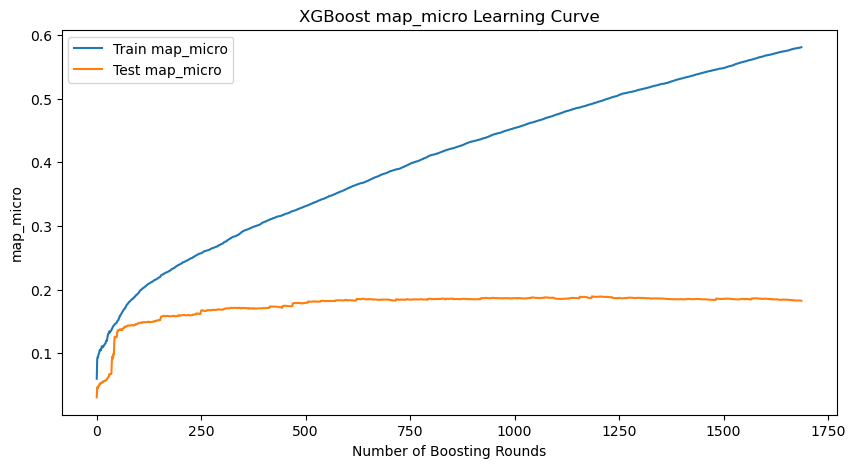

In [8]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

def map_micro(preds, dtrain):
    labels = dtrain.get_label()
    # Calculate the MAP score
    score = average_precision_score(labels, preds, average='micro')
    return 'map_micro', score

# Parameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'tree_method': 'hist',  # Utilize GPU for histogram construction
    'learning_rate': 0.1,
    'device': 'cuda',
    'max_depth': 6,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
}

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Setting a very large number for num_boost_round and using early stopping
num_boost_round = 1000000  # A large number, effectively "infinite"
early_stopping_rounds = 500  # Stops training if no improvement in 50 rounds
evals_result = {}
# Train model
model = xgb.train(params, dtrain, evals=[(dtrain, 'train'), (dtest, 'test')], 
                  num_boost_round=num_boost_round, early_stopping_rounds=early_stopping_rounds,
                  evals_result=evals_result, custom_metric=map_micro,
                  maximize=True)  # Since MAP is higher the better

# Best iteration and best score
best_iteration = model.best_iteration
best_score = model.best_score
print(f"Best iteration: {best_iteration}, Best map_micro: {best_score}")

# Save the model
model.save_model('xgboost_model.bin')


# Plotting the learning curve for AUCPR
train_aucpr = evals_result['train']['map_micro']
test_aucpr = evals_result['test']['map_micro']
plt.figure(figsize=(10, 5))
plt.plot(train_aucpr, label='Train map_micro')
plt.plot(test_aucpr, label='Test map_micro')
plt.title('XGBoost map_micro Learning Curve')
plt.xlabel('Number of Boosting Rounds')
plt.ylabel('map_micro')
plt.legend()
plt.show()